# 데이터 전처리

In [18]:
# 라이브러리
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
fish_data = np.column_stack((fish_length, fish_weight))  # 세로로 길게 세운 다음 세로로 붙임 
# fish_data

fish_target = np.concatenate((np.ones(35), np.zeros(14)))  # 가로로 길게 이어 붙임 
# fish_target

## 사이킷런으로 데이터 나누기

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=24)

## 수상한 도미 한마리

In [13]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [15]:
print(kn.predict([[25,150]]))  # 빙어어

[0.]


In [17]:
distances, indices = kn.kneighbors([[25, 150]])

# distances: 지정한 샘플과 가장 가까운 이웃 간의 거리.
# indices: 가까운 이웃들의 학습 데이터 내 인덱스.

Text(0, 0.5, 'weight')

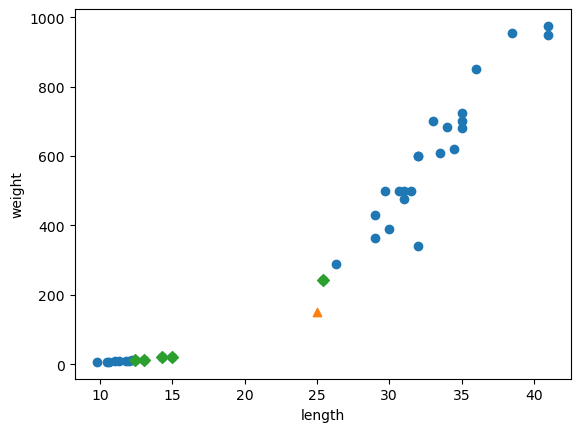

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indices,0], train_input[indices,1], marker='D')  #가장 가까운 이웃의 판단 
plt.xlabel('length')
plt.ylabel('weight')

## 기준을 맞춰라 

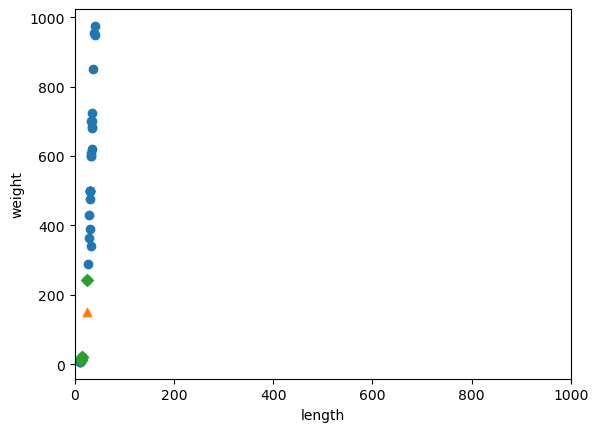

In [24]:
# x축과 y축의 길이가 다름

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indices,0], train_input[indices,1], marker='D')  #가장 가까운 이웃의 판단 
plt.xlabel('length')
plt.ylabel('weight')
plt.xlim(0,1000)
plt.show()


## 표준 점수로 바꾸기

In [27]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)

[ 25.83333333 397.68611111] [ 10.31328701 318.95143148]


In [29]:
train_scaled = (train_input - mean) / std  # 넘파이의 브로드캐스팅팅
train_scaled

array([[ 0.98578335,  1.41812779],
       [ 0.50097187,  0.24240019],
       [ 1.47059484,  1.81003699],
       [-1.05042489, -1.18446282],
       [ 0.79185876,  0.90080765],
       [ 0.59793417,  0.63430939],
       [ 0.84033991,  0.69701486],
       [-1.34131178, -1.21612908],
       [ 1.2281891 ,  1.74733152],
       [ 0.37492088,  0.32078203],
       [ 0.88882106,  0.94783675],
       [-1.36070424, -1.21581555],
       [ 0.54945302,  0.32078203],
       [-1.24434948, -1.20860442],
       [ 0.59793417, -0.18086174],
       [-1.11829849, -1.18508987],
       [ 0.88882106,  1.02621859],
       [ 0.40400957, -0.02409806],
       [-1.30252686, -1.2048421 ],
       [-1.47705899, -1.22490785],
       [ 0.47188318,  0.32078203],
       [-1.40918539, -1.21957788],
       [-1.43827408, -1.21644261],
       [ 0.50097187,  0.32078203],
       [ 0.74337761,  0.66566213],
       [-1.55462883, -1.22584843],
       [ 0.30704727,  0.10131288],
       [ 0.59793417,  0.63430939],
       [-1.48675522,

## 전처리 데이터로 모델 훈련하기

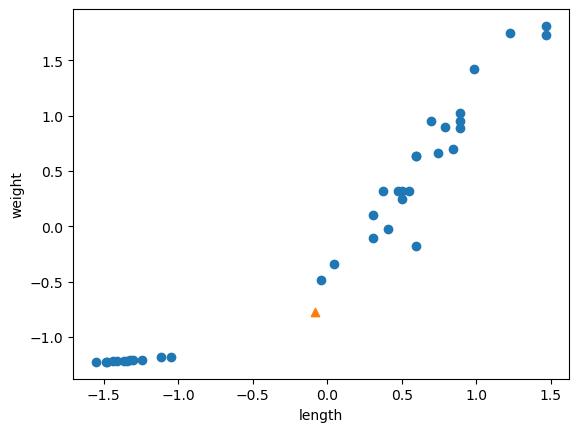

In [41]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [42]:
# 다시 훈련
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [43]:
test_scaled = (test_input - mean) / std

In [44]:
kn.score(test_scaled, test_target)

1.0

In [45]:
print(kn.predict([new]))  #도미라고 제대로 예측

[1.]


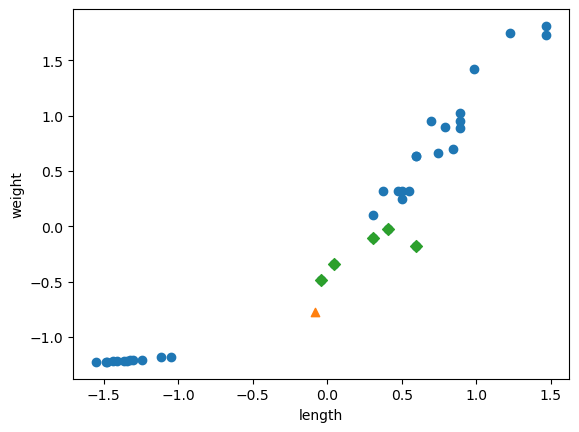

In [46]:
distances, indices = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indices,0], train_scaled[indices,1], marker='D')  #가장 가까운 이웃의 판단 
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 스케일 -> 가까운 네이버가 달라짐!